In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
# CSV 파일 불러오기

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/82107/Desktop/deepLearning/week1/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [7]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [9]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

Text(0.5, 1.0, 'Rings')

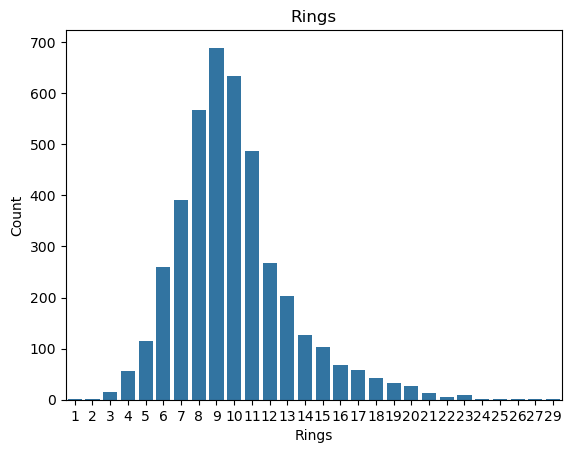

In [11]:
# Rings
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [13]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [15]:
# 원핫 인코딩 (Sex 열만)
df_sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex')

# 숫자형으로 변환
df_sex_encoded = df_sex_encoded.astype(int)

# 원래 데이터프레임과 원핫 인코딩된 데이터프레임 합치기
df_final = pd.concat([df.drop('Sex', axis=1), df_sex_encoded], axis=1)

In [17]:
df_final

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1


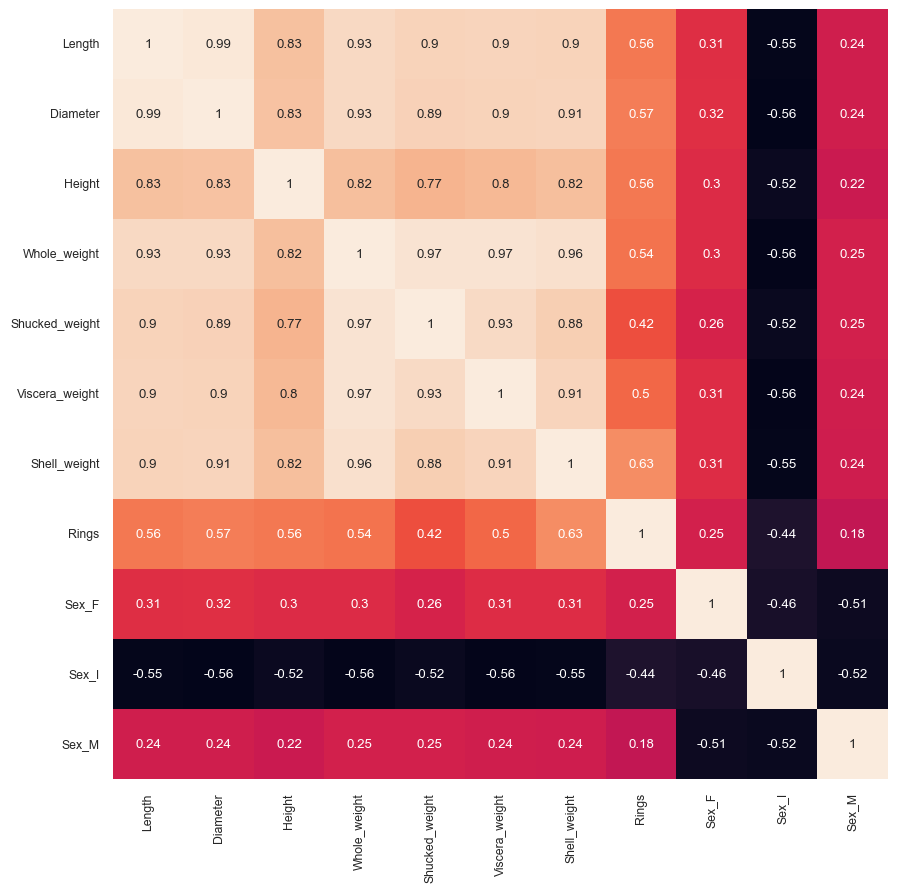

In [19]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_final.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# Rings와 상관관계가 높은 건  Shell_weight

## X,Y 설정 및 Numpy 변환

In [72]:
X=df_final.drop('Rings',axis=1).values
X

array([[0.455, 0.365, 0.095, ..., 0.   , 0.   , 1.   ],
       [0.35 , 0.265, 0.09 , ..., 0.   , 0.   , 1.   ],
       [0.53 , 0.42 , 0.135, ..., 1.   , 0.   , 0.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.   , 0.   , 1.   ],
       [0.625, 0.485, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.   , 0.   , 1.   ]])

In [74]:
y=df_final['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [76]:
# 원-핫 인코딩 (결과가 False,True로 나올 경우가 있음)
y_encoded = pd.get_dummies(y).values

# 숫자형으로 변환
Y = y_encoded.astype(int)
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=10) 

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3341, 10), (3341, 28), (836, 10), (836, 28))

In [80]:
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

# 첫 번째 층: 64개의 뉴런
model.add(Dense(64, input_shape=(10,), activation='relu'))  # input_shape : feature 의 개수
# 두 번째 층: 32개의 뉴런
model.add(Dense(32, activation='relu'))
# 세 번째 층: 16개의 뉴런
model.add(Dense(16, activation='relu'))
# 출력층: 회귀이므로 1개의 노드
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
# model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\82107\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0353 - mae: 0.0723 - val_loss: 0.0344 - val_mae: 0.0686
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0344 - mae: 0.0688 - val_loss: 0.0344 - val_mae: 0.0682
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0344 - mae: 0.0688 - val_loss: 0.0344 - val_mae: 0.0683
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0344 - mae: 0.0688 - val_loss: 0.0344 - val_mae: 0.0689
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0344 - mae: 0.0689 - val_loss: 0.0344 - val_mae: 0.0689
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0344 - mae: 0.0689 - val_loss: 0.0344 - val_mae: 0.0689
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0344 - mae: 0.0689 - val_loss: 0.0344 - val_mae: 0.0684
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0344 - mae: 0.0689 - val_loss: 0.0344 - val_mae: 0.0685
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

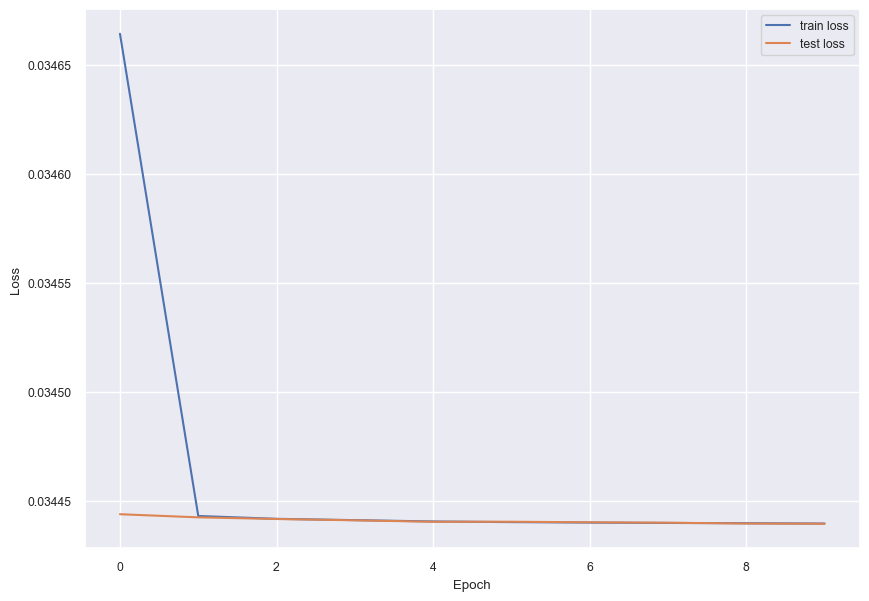

In [83]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mae: 0.0687


[0.03443952649831772, 0.06880272179841995]